In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## 01 Exercise

### 1.

In [66]:

weight = 0.3
bias = 0.9

X = torch.arange(0, 2, 0.02).unsqueeze(dim=1)
y = weight * X + bias
X[10], y[:10]

(tensor([0.2000]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [68]:
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

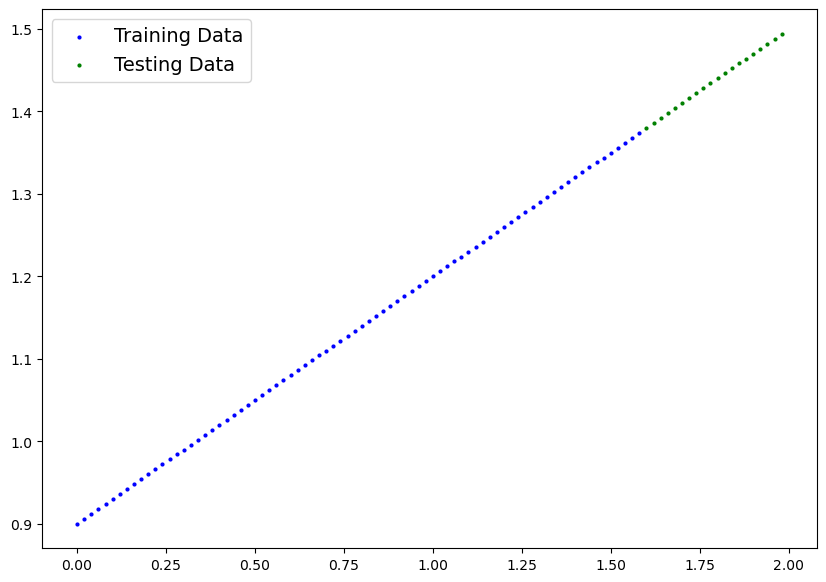

In [70]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

plot_predictions(X_train, y_train, X_test, y_test)

## 2.

In [79]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [82]:
torch.manual_seed(50)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weight', tensor([0.4625])), ('bias', tensor([-0.1692]))])

## 3.

In [89]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [119]:
epochs = 300

for epoch in range(epochs):
    model_1.train()
    y_train_pred = model_1(X_train)
    train_loss = loss_fn(y_train_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        model_1.eval()
        with torch.inference_mode():
            y_test_pred = model_1(X_test)
            test_loss = loss_fn(y_test_pred, y_test)

        print(f"Epoch: {epoch} | Training Loss: {train_loss} | Testing Loss: {test_loss}")
        print(model_1.state_dict())

Epoch: 0 | Training Loss: 0.924608588218689 | Testing Loss: 0.7300763726234436
OrderedDict([('weight', tensor([0.4783])), ('bias', tensor([-0.1492]))])
Epoch: 20 | Training Loss: 0.5997886061668396 | Testing Loss: 0.24725639820098877
OrderedDict([('weight', tensor([0.6363])), ('bias', tensor([0.0508]))])
Epoch: 40 | Training Loss: 0.2993209958076477 | Testing Loss: 0.20493872463703156
OrderedDict([('weight', tensor([0.7818])), ('bias', tensor([0.2425]))])
Epoch: 60 | Training Loss: 0.23311738669872284 | Testing Loss: 0.3528388440608978
OrderedDict([('weight', tensor([0.8063])), ('bias', tensor([0.3465]))])
Epoch: 80 | Training Loss: 0.20957879722118378 | Testing Loss: 0.3789626955986023
OrderedDict([('weight', tensor([0.7852])), ('bias', tensor([0.4105]))])
Epoch: 100 | Training Loss: 0.19062913954257965 | Testing Loss: 0.36545297503471375
OrderedDict([('weight', tensor([0.7497])), ('bias', tensor([0.4605]))])
Epoch: 120 | Training Loss: 0.1723433881998062 | Testing Loss: 0.33813667297

## 4.

In [134]:
model_1.eval()
with torch.inference_mode():
    predictions = model_1(X_test)

predictions

tensor([[1.3936],
        [1.4000],
        [1.4064],
        [1.4128],
        [1.4192],
        [1.4257],
        [1.4321],
        [1.4385],
        [1.4449],
        [1.4513],
        [1.4577],
        [1.4642],
        [1.4706],
        [1.4770],
        [1.4834],
        [1.4898],
        [1.4962],
        [1.5027],
        [1.5091],
        [1.5155]])

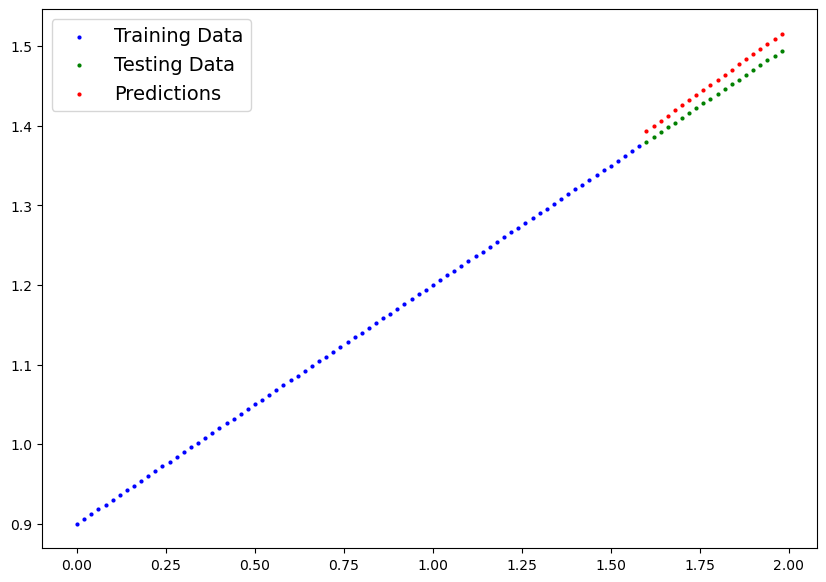

In [136]:
plot_predictions(X_train, y_train, X_test, y_test, predictions)

## 5.

In [141]:
torch.save(model_1.state_dict(),"models/01_pytorch_exercise_model.pt")

In [143]:
load_model = LinearRegressionModel()
load_model.load_state_dict(torch.load("models/01_pytorch_exercise_model.pt"))
load_model.eval()

LinearRegressionModel()

In [145]:
load_model.state_dict()

OrderedDict([('weight', tensor([0.3208])), ('bias', tensor([0.8803]))])

In [147]:
with torch.inference_mode():
    load_predictions = load_model(X_test)

load_predictions[:10], predictions[:10]

(tensor([[1.3936],
         [1.4000],
         [1.4064],
         [1.4128],
         [1.4192],
         [1.4257],
         [1.4321],
         [1.4385],
         [1.4449],
         [1.4513]]),
 tensor([[1.3936],
         [1.4000],
         [1.4064],
         [1.4128],
         [1.4192],
         [1.4257],
         [1.4321],
         [1.4385],
         [1.4449],
         [1.4513]]))